# Python com Banco de Dados MySQL

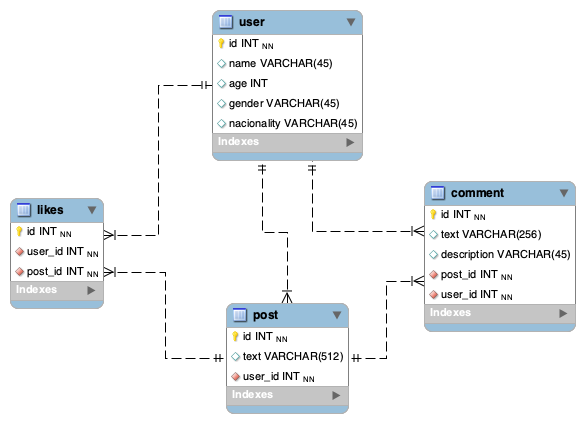

Iremos implementar um banco de dados para um aplicativo de mídia social. Ele consistirá em quatro tabelas:
- **user**, que representa os usuários;
- **post**, que representa as postagens de cada usuário; cada um pode fazer **n** posts;
- **comment**, quer representa os comentários dos usuários em cada postagem; um usuário pode fazer **n** comentários e um post pode ter **n** comentários;
- **likes\***, quer representa as curtidas dos usuários nas postagens; um post pode ter **n** likes e um usuário pode dar **n** likes. 

Cada tabela tem uma chave primária própria auto incrementada. Um diagrama relacional deste banco é mostrado acima.

\* o nome da tabela está no plural porque a palava `like` é uma palavra reservada no MySQL e não pode ser usada como nome de tabela nem de campo.

## Instalando a biblioteca MySQL

Não existe um módulo SQL Python padrão que você possa usar para se conectar a um banco de dados MySQL. Por isso, você precisará instalar um driver Python SQL para MySQL para interagir com um banco de dados MySQL a partir de um aplicativo Python. Um desses drivers é o mysql-connector-python. Você pode baixar este módulo SQL Python com o pip:

In [ ]:
!pip install mysql-connector-python

## Fazendo uma conexão com o banco

In [3]:
import mysql.connector
from mysql.connector import Error

def create_connection(host_name, user_name, user_password):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password
        )
        print("Connection to MySQL DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [4]:
## é necessário ter uma conta alunos com senha alunos no banco
connection = create_connection("localhost", "alunos", "alunos")

Connection to MySQL DB successful


## Criar o banco

In [5]:
def create_database(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        print("Database created successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

In [6]:
create_database_query = "CREATE DATABASE IF NOT EXISTS sm_app"
create_database(connection, create_database_query)

Database created successfully


In [7]:
def create_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            database=db_name
        )
        print("Connection to MySQL DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [8]:
## recriar a conexão agora aceitando o database
connection = create_connection("localhost", "alunos", "alunos", "sm_app")

Connection to MySQL DB successful


## Função para execução de comandos DDL e comandos DML insert, update e delete

Quando o comando é um insert a função imprime o último id que foi criado pelo autoincrement

In [24]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
        
        # imprimir o id criado pelo autoincrement somente nos inserts, 
        # pois nos demais comandos dá resultados incoerentes
        if query.lstrip().upper().startswith('INSERT'):
            print('Last insert id:', cursor.lastrowid)
    except Error as e:
        print(f"The error '{e}' occurred")

In [25]:
# executa queries parametrizadas
def execute_par_query(connection, query, pars):
    cursor = connection.cursor()
    try:
        cursor.execute(query, pars)
        connection.commit()
        print("Query executed successfully")
        
        # imprimir o id criado pelo autoincrement somente nos inserts, 
        # pois nos demais comandos dá resultados incoerentes
        if query.lstrip().upper().startswith('INSERT'):
            print('Last insert id:', cursor.lastrowid)
    except Error as e:
        print(f"The error '{e}' occurred")

## Dropando tabelas

In [26]:
drop_users_table = """
DROP TABLE IF EXISTS user;
"""
drop_posts_table = """
DROP TABLE IF EXISTS post;
"""
drop_comments_table = """
DROP TABLE IF EXISTS comment;
"""
drop_likes_table = """
DROP TABLE IF EXISTS likes;
"""

In [27]:
execute_query(connection, drop_likes_table) 
execute_query(connection, drop_comments_table) 
execute_query(connection, drop_posts_table) 
execute_query(connection, drop_users_table) 

Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully


## Criando tabelas

In [28]:
create_users_table = """
CREATE TABLE IF NOT EXISTS user (
  id INT AUTO_INCREMENT, 
  name TEXT NOT NULL, 
  age INT, 
  gender TEXT, 
  nationality TEXT, 
  PRIMARY KEY (id)
) ENGINE = InnoDB
"""

In [29]:
execute_query(connection, create_users_table) 

Query executed successfully


In [30]:
create_posts_table = """
CREATE TABLE IF NOT EXISTS post (
  id INT AUTO_INCREMENT, 
  title TEXT NOT NULL, 
  description TEXT NOT NULL, 
  user_id INTEGER NOT NULL, 
  FOREIGN KEY fk_user_id (user_id) REFERENCES user(id), 
  PRIMARY KEY (id)
) ENGINE = InnoDB
"""

In [31]:
execute_query(connection, create_posts_table)

Query executed successfully


In [32]:
create_comments_table = """
CREATE TABLE IF NOT EXISTS comment (
  id INTEGER AUTO_INCREMENT, 
  text TEXT NOT NULL, 
  user_id INTEGER NOT NULL, 
  post_id INTEGER NOT NULL, 
  PRIMARY KEY (id),
  FOREIGN KEY fk_user_id (user_id) REFERENCES user (id), 
  FOREIGN KEY fk_post_id (post_id) REFERENCES post (id)
) ENGINE = InnoDB;
"""

create_likes_table = """
CREATE TABLE IF NOT EXISTS likes (
  id INTEGER AUTO_INCREMENT, 
  user_id INTEGER NOT NULL, 
  post_id integer NOT NULL, 
  PRIMARY KEY (id),
  FOREIGN KEY fk_user_id (user_id) REFERENCES user (id), 
  FOREIGN KEY fk_post_id (post_id) REFERENCES post (id)
) ENGINE = InnoDB;
"""

execute_query(connection, create_comments_table)  
execute_query(connection, create_likes_table)            

Query executed successfully
Query executed successfully


## Inserindo Dados

In [33]:
create_user = """
INSERT INTO
  user (name, age, gender, nationality)
VALUES
  ('James', 25, 'male', 'USA'),
  ('Leila', 32, 'female', 'France'),
  ('Brigitte', 35, 'female', 'England'),
  ('Mike', 40, 'male', 'Denmark'),
  ('Elizabeth', 21, 'female', 'Canada');
"""

execute_query(connection, create_user)   

Query executed successfully
Last insert id: 1


### Os dados também podem ser inseridos de forma parametrizada

In [35]:
post_list =   [("Happy", "I am feeling very happy today", 1),
  ("Hot Weather", "The weather is very hot today", 2),
  ("Help", "I need some help with my work", 2),
  ("Great News", "I am getting married", 1),
  ("Interesting Game", "It was a fantastic game of tennis", 5),
  ("Party", "Anyone up for a late-night party today?", 3)]

create_post = """
INSERT INTO
  post (title, description, user_id)
VALUES
  (%s,%s,%s);
"""
for post in post_list:
    execute_par_query(connection, create_post, post)  

Query executed successfully
Last insert id: 1
Query executed successfully
Last insert id: 2
Query executed successfully
Last insert id: 3
Query executed successfully
Last insert id: 4
Query executed successfully
Last insert id: 5
Query executed successfully
Last insert id: 6


In [37]:
create_comment = """
INSERT INTO
  comment (text, user_id, post_id)
VALUES
  ('Count me in', 1, 6),
  ('What sort of help?', 5, 3),
  ('Congrats buddy', 2, 4),
  ('I was rooting for Nadal though', 4, 5),
  ('Help with your thesis?', 2, 3),
  ('Many congratulations', 5, 4);
"""

create_like = """
INSERT INTO
  likes (user_id, post_id)
VALUES
  (1, 6),
  (2, 3),
  (1, 5),
  (5, 4),
  (2, 4),
  (4, 2),
  (3, 6);
"""

execute_query(connection, create_comment)
execute_query(connection, create_like)  

Query executed successfully
Last insert id: 7
Query executed successfully
Last insert id: 1


## Selecionando dados

In [38]:
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

In [39]:
select_user = "SELECT * from user"
user = execute_read_query(connection, select_user)

for user in user:
    print(user)

(1, 'James', 25, 'male', 'USA')
(2, 'Leila', 32, 'female', 'France')
(3, 'Brigitte', 35, 'female', 'England')
(4, 'Mike', 40, 'male', 'Denmark')
(5, 'Elizabeth', 21, 'female', 'Canada')


In [40]:
select_post = "SELECT * FROM post"
post = execute_read_query(connection, select_post)

for post in post:
    print(post)

(1, 'Happy', 'I am feeling very happy today', 1)
(2, 'Hot Weather', 'The weather is very hot today', 2)
(3, 'Help', 'I need some help with my work', 2)
(4, 'Great News', 'I am getting married', 1)
(5, 'Interesting Game', 'It was a fantastic game of tennis', 5)
(6, 'Party', 'Anyone up for a late-night party today?', 3)


## Fazendo Joins

In [41]:
select_user_post = """
SELECT
  user.id,
  user.name,
  post.description
FROM
  post
  INNER JOIN user ON user.id = post.user_id
"""

user_post = execute_read_query(connection, select_user_post)

for user_post in user_post:
    print(user_post)

(1, 'James', 'I am feeling very happy today')
(1, 'James', 'I am getting married')
(2, 'Leila', 'The weather is very hot today')
(2, 'Leila', 'I need some help with my work')
(3, 'Brigitte', 'Anyone up for a late-night party today?')
(5, 'Elizabeth', 'It was a fantastic game of tennis')


In [42]:
select_post_comment_user = """
SELECT
  post.description as post,
  text as comment,
  name
FROM
  post
  INNER JOIN comment ON post.id = comment.post_id
  INNER JOIN user ON user.id = comment.user_id
"""

post_comment_user = execute_read_query(
    connection, select_post_comment_user
)

for post_comment_user in post_comment_user:
    print(post_comment_user)

('Anyone up for a late-night party today?', 'Count me in', 'James')
('Anyone up for a late-night party today?', 'Count me in', 'James')
('I am getting married', 'Congrats buddy', 'Leila')
('I need some help with my work', 'Help with your thesis?', 'Leila')
('I am getting married', 'Congrats buddy', 'Leila')
('I need some help with my work', 'Help with your thesis?', 'Leila')
('It was a fantastic game of tennis', 'I was rooting for Nadal though', 'Mike')
('It was a fantastic game of tennis', 'I was rooting for Nadal though', 'Mike')
('I need some help with my work', 'What sort of help?', 'Elizabeth')
('I am getting married', 'Many congratulations', 'Elizabeth')
('I need some help with my work', 'What sort of help?', 'Elizabeth')
('I am getting married', 'Many congratulations', 'Elizabeth')


In [43]:
cursor = connection.cursor()
cursor.execute(select_post_comment_user)
cursor.fetchall()

column_names = [description[0] for description in cursor.description]
print(column_names)

['post', 'comment', 'name']


## Where

In [45]:
select_post_like = """
SELECT
  description as Post,
  COUNT(likes.id) as likes
FROM
  likes,
  post
WHERE
  post.id = likes.post_id
GROUP BY
  likes.post_id
"""

post_like = execute_read_query(connection, select_post_like)

for post_like in post_like:
    print(post_like)

('The weather is very hot today', 1)
('I need some help with my work', 1)
('I am getting married', 2)
('It was a fantastic game of tennis', 1)
('Anyone up for a late-night party today?', 2)


## Queries parametrizadas

In [46]:
def execute_read_par_query(connection, query, pars):
    cursor = connection.cursor()
    result = None
    #try:
    cursor.execute(query,pars)
    result = cursor.fetchall()
    return result
    #except Error as e:
        #print(f"The error '{e}' occurred")

In [48]:
select_user = "SELECT * from user where gender = %s"

vals = tuple(['female']) 
user = execute_read_par_query(connection, select_user,vals)

for user in user:
    print(user)

(2, 'Leila', 32, 'female', 'France')
(3, 'Brigitte', 35, 'female', 'England')
(5, 'Elizabeth', 21, 'female', 'Canada')


## Fazendo updates

In [49]:
select_post_description = "SELECT description FROM post WHERE id = 2"

post_description = execute_read_query(connection, select_post_description)

for description in post_description:
    print(description)

('The weather is very hot today',)


In [50]:
update_post_description = """
UPDATE
  post
SET
  description = "The weather has become pleasant now"
WHERE
  id = 2
"""

execute_query(connection, update_post_description)

Query executed successfully


In [51]:
#executando a query de novo
post_description = execute_read_query(connection, select_post_description)

for description in post_description:
    print(description)

('The weather has become pleasant now',)


### Fazendo updates parametrizados

In [52]:
select_post_description = "SELECT description FROM post WHERE id = %s"

id_to_update = tuple([3])

post_description = execute_read_par_query(connection, select_post_description, id_to_update)

for description in post_description:
    print(description)

('I need some help with my work',)


In [53]:
update_post_description = """
UPDATE
  post
SET
  description = "Actually I'm done."
WHERE
  id = %s
"""

execute_par_query(connection, update_post_description, id_to_update)

Query executed successfully


In [54]:
post_description = execute_read_par_query(connection, select_post_description,id_to_update)

for description in post_description:
    print(description)

("Actually I'm done.",)


## Deletando registros

In [55]:
select_comment = "SELECT * FROM comment"
comment = execute_read_query(connection, select_comment)

for comment in comment:
    print(comment)

(1, 'Count me in', 1, 6)
(2, 'What sort of help?', 5, 3)
(3, 'Congrats buddy', 2, 4)
(4, 'I was rooting for Nadal though', 4, 5)
(5, 'Help with your thesis?', 2, 3)
(6, 'Many congratulations', 5, 4)
(7, 'Count me in', 1, 6)
(8, 'What sort of help?', 5, 3)
(9, 'Congrats buddy', 2, 4)
(10, 'I was rooting for Nadal though', 4, 5)
(11, 'Help with your thesis?', 2, 3)
(12, 'Many congratulations', 5, 4)


In [56]:
delete_comment = "DELETE FROM comment WHERE id = 5"
execute_query(connection, delete_comment)

Query executed successfully


In [57]:
comment = execute_read_query(connection, select_comment)

for comment in comment:
    print(comment)

(1, 'Count me in', 1, 6)
(2, 'What sort of help?', 5, 3)
(3, 'Congrats buddy', 2, 4)
(4, 'I was rooting for Nadal though', 4, 5)
(6, 'Many congratulations', 5, 4)
(7, 'Count me in', 1, 6)
(8, 'What sort of help?', 5, 3)
(9, 'Congrats buddy', 2, 4)
(10, 'I was rooting for Nadal though', 4, 5)
(11, 'Help with your thesis?', 2, 3)
(12, 'Many congratulations', 5, 4)


### Fazendo deletes parametrizados

In [58]:
select_comment = "SELECT * FROM comment"
comment = execute_read_query(connection, select_comment)

for comment in comment:
    print(comment)

(1, 'Count me in', 1, 6)
(2, 'What sort of help?', 5, 3)
(3, 'Congrats buddy', 2, 4)
(4, 'I was rooting for Nadal though', 4, 5)
(6, 'Many congratulations', 5, 4)
(7, 'Count me in', 1, 6)
(8, 'What sort of help?', 5, 3)
(9, 'Congrats buddy', 2, 4)
(10, 'I was rooting for Nadal though', 4, 5)
(11, 'Help with your thesis?', 2, 3)
(12, 'Many congratulations', 5, 4)


In [60]:
delete_comment = "DELETE FROM comment WHERE id = %s"
id_to_delete = tuple([3])
execute_par_query(connection, delete_comment, id_to_delete)

Query executed successfully


In [61]:
comment = execute_read_query(connection, select_comment)

for comment in comment:
    print(comment)

(1, 'Count me in', 1, 6)
(2, 'What sort of help?', 5, 3)
(4, 'I was rooting for Nadal though', 4, 5)
(6, 'Many congratulations', 5, 4)
(7, 'Count me in', 1, 6)
(8, 'What sort of help?', 5, 3)
(9, 'Congrats buddy', 2, 4)
(10, 'I was rooting for Nadal though', 4, 5)
(11, 'Help with your thesis?', 2, 3)
(12, 'Many congratulations', 5, 4)
